Creates files to extract the images the faces from, and also determines which files are East Asian

In [1]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
img_file = pd.read_excel('Labeled_instagram_posts_related_to_covid.xlsx')

In [3]:
print(img_file.shape)
print(img_file.head())
print(img_file.loc[(img_file['Q2_cetegory'] == 1) & ((img_file['Q2A_Type of Human'] == 1) | (img_file['Q2A_Type of Human'] == 3) )].shape)
print(img_file.loc[(img_file['Q2_cetegory'] == 1) & (img_file['Q2A_Type of Human'] == 1) ].shape)
print(img_file.loc[(img_file['Q2_cetegory'] == 1) & ((img_file['Q2A_Type of Human'] == 1) | (img_file['Q2A_Type of Human'] == 3) ) & (img_file['Q5A.  If yes to Q5, what type of Asian'] == 1)].shape)

(9648, 26)
     imagename  postid dataset  dataset.1   postdate  \
0  B-A5FIIIEKJ    5592  middle          2 2020-03-21   
1  B-A74YQn_4a    5593  middle          2 2020-03-21   
2  B-AajnDp6GQ    5575  middle          2 2020-03-21   
3  B-AarR4pUQA    5576  middle          2 2020-03-21   
4  B-AE1y3HD-Z    5550  middle          2 2020-03-21   

                                            Contents  \
0  #covid #covid2020 #covidvirus #virus #coronava...   
1  Well this is the final mural of my trip in Aus...   
2  Chegamos !!! Vão seguindo o movimento... Tem m...   
3                                              😻😻😻😻😻   
4  EN MI DOMICILIO 🏡_x000D__x000D__x000D__x000D_\...   

                                        url  Q1_pertain_to_covid  Q2_cetegory  \
0  https://www.instagram.com/p/B-A5FIIIEKJ/                    1            1   
1  https://www.instagram.com/p/B-A74YQn_4a/                    1            1   
2  https://www.instagram.com/p/B-AajnDp6GQ/                    2        

In [4]:
print(img_file['Q5A.  If yes to Q5, what type of Asian'].value_counts())

99    8924
1      633
2       74
3       17
Name: Q5A.  If yes to Q5, what type of Asian, dtype: int64


In [5]:
asian_faces=img_file.loc[(img_file['Q2_cetegory'] == 1) & ((img_file['Q2A_Type of Human'] == 1) | (img_file['Q2A_Type of Human'] == 3) ) & (img_file['Q5A.  If yes to Q5, what type of Asian'] == 1)]
asian_faces['imagename'].to_csv('asian_faces.csv',index=False)

In [6]:
asian_faces.shape

(269, 26)

In [7]:
print(asian_faces['imagename'].head())

154    B-F13bWJcYi
192    B-FPkrkhYLt
444    B-LFzeOBB8p
889    B7_3ehug3cu
932    B7_JyG7n9Ty
Name: imagename, dtype: object


In [8]:
asian_faces['imagename'].tolist()

['B-F13bWJcYi',
 'B-FPkrkhYLt',
 'B-LFzeOBB8p',
 'B7_3ehug3cu',
 'B7_JyG7n9Ty',
 'B7_y1rylis2',
 'B7-1pjpH4yE',
 'B7-7cgkJ92L',
 'B7-AnMthOVU',
 'B7-fUP9nq8e',
 'B7-fYimH98P',
 'B7-HQjdFJ5s',
 'B7-lHG2gFp_',
 'B7-q1PGARj8',
 'B7-T7zPHKHI',
 'B7-uq6UhT5n',
 'B7-wpp0HBVa',
 'B700hJJHlI9',
 'B702BVglbYA',
 'B70eWG-JECv',
 'B70gtjtpZPF',
 'B70JLzghrd6',
 'B70sZkxp2Rn',
 'B70xsGepCnw',
 'B71hUvepX5A',
 'B721kfjJfjl',
 'B721oL1JPMn',
 'B721rWWpD-m',
 'B7248ZqFfsc',
 'B72cvy3n30A',
 'B72K6b1nIio',
 'B72ow1MpRHo',
 'B72prd1gZhA',
 'B72tV_3gSoD',
 'B72WW9BBlHR',
 'B72z4lQhYvT',
 'B73F58zHwL4',
 'B73hmd6AVRk',
 'B73HmvapmGC',
 'B73Jxz6BljN',
 'B73nsFIBLQ_',
 'B73QHPnlPbO',
 'B73qQxNHBM_',
 'B74-0A2BXWN',
 'B747QPKgMkW',
 'B74cxJpHy5t',
 'B74Fgb9nr5w',
 'B74mpLLllN2',
 'B74zY3hF-9u',
 'B750Sd1nZsE',
 'B754piMHrN1',
 'B75aJlllWJw',
 'B75ih-wBmhT',
 'B75IJw_hRgP',
 'B75MXcBgAOu',
 'B75njwRhwQf',
 'B75nQGBp_er',
 'B75O8dPh3F8',
 'B75pvFygIiH',
 'B75twJ6Jj2y',
 'B75uN53HG50',
 'B769DrDBnfm',
 'B76BWh

In [9]:
print('B72K6b1nIio' in asian_faces['imagename'].tolist())

True


In [10]:
#files_to_copy = img_file.loc[(img_file['Q2_cetegory'] == 1) & (img_file['Q2A_Type of Human'] == 1)]
files_to_copy = img_file.loc[(img_file['Q2_cetegory'] == 1) & ((img_file['Q2A_Type of Human'] == 1) | (img_file['Q2A_Type of Human'] == 3) )]

In [11]:
folder = "img_0126-0209/"
onlyfiles = [f for f in listdir(folder) if isfile(join(folder, f))]

In [12]:
print(onlyfiles[:10])
print(len(onlyfiles))

['10000_B79WUMsh6aR.jpg', '10001_B77PT81hxym.jpg', '10002_B77psIEAkss.jpg', '10003_B79UgwkIiKM.jpg', '10004_B76x_Pao9C8.jpg', '10005_B76dq8xA98N.jpg', '10006_B75AF-Kh1RZ.jpg', '10007_B79CcZSJiB6.jpg', '10008_B76ayk6g1Rf.jpg', '10009_B75NY3cHAOa.jpg']
38499


In [13]:
print(files_to_copy.shape)

(835, 26)


In [14]:
files_to_copy['imagename'].values.tolist()

['B-A5FIIIEKJ',
 'B-A74YQn_4a',
 'B-AE1y3HD-Z',
 'B-AmlcFhWsy',
 'B-AtsrJo2AJ',
 'B-B4nFeFW12',
 'B-BDm9MgC6W',
 'B-BGs-MAtdY',
 'B-BGS5-g2bz',
 'B-BMMPphcKl',
 'B-Bx2wUnYBj',
 'B-C_5b1APTH',
 'B-C-dk4nI0l',
 'B-C9KeSh0Tv',
 'B-CdsXcF17c',
 'B-CdvR3q7nP',
 'B-CInPfhLCk',
 'B-CLnnDoBZd',
 'B-CWRc8lUCl',
 'B-DGU8-pAaJ',
 'B-DIJfzF3mZ',
 'B-E_oKXDdPe',
 'B-EDf3YhRaI',
 'B-EFbMFp9uw',
 'B-Ep8NNjSge',
 'B-F13bWJcYi',
 'B-F29JmBVXS',
 'B-F5cJlAkE-',
 'B-FgtVCqKTg',
 'B-FowNYp5da',
 'B-FP-gFhyCO',
 'B-FPkrkhYLt',
 'B-FPPaJlOcz',
 'B-Fq3UdFd4-',
 'B-FUEboHxhX',
 'B-Fw-kxoQ3w',
 'B-FX7_zqbXH',
 'B-GKbW8BWcJ',
 'B-H0gMPlPw-',
 'B-HdcE9J5iZ',
 'B-HTC9QDiQ8',
 'B-Hx6tFB0wj',
 'B-IKgAipS0S',
 'B-IlXZuBdtJ',
 'B-IN_tFD4L0',
 'B-IPiqyB-_t',
 'B-IrV8MDmCU',
 'B-IY_avotVF',
 'B-J-_H6DU3t',
 'B-J8BxzJbBU',
 'B-JcPPuBzd9',
 'B-JePK4hP2b',
 'B-JYvv5nn0U',
 'B-JZWV8lJkt',
 'B-K_SF4nTYo',
 'B-K-H3VBCr5',
 'B-K7Q9BFX8_',
 'B-K9ODIppAi',
 'B-KDbUqlL2l',
 'B-KI9AUl0-E',
 'B-KPd47lfdy',
 'B-KpI2hhE0R',
 'B-KTrr

In [15]:
substring = 'B73U_QEJdKo'
print([string for string in onlyfiles if substring in string])

['6645_B73U_QEJdKo.jpg']


In [16]:
#os.mkdir('./Images')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: './Images'

In [17]:
x = 0
for name in files_to_copy['imagename']:
    file = [string for string in onlyfiles if name in string]
    if(file):
        file_name = folder+file[0]
        if(len(file)!=1):
            print(file)
        #print(file)
        img = cv2.imread(folder+file[0])
        #print(file_name)
        cv2.imwrite('Images/'+file[0],img)
        #print(img.shape)
    x+=1
    #if(x == 200):
    #    break

['37885_B8Tv8CpnsiP.jpg', '38164_B8Tv8CpnsiP.jpg']


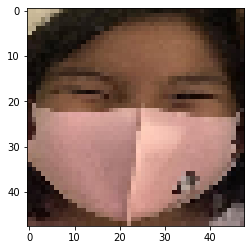

In [23]:
n_img = cv2.imread('Extracted_Faces/4419_B73Jxz6BljN_0.jpg')
img = n_img[:,:, ::-1]
plt.imshow(cv2.resize(img, (48, 48)))